<a href="https://colab.research.google.com/github/ayyucedemirbas/machine_learning_algorithms/blob/master/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kodlar: https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f (visited: 09/22/2020)

In [7]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [8]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [9]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.615,
Theta1:          3.462
Final cost/MSE:  5476.086


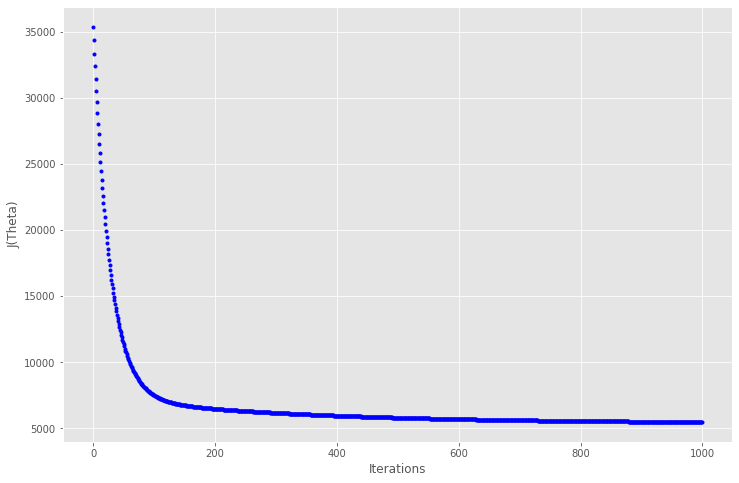

In [10]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

750 den sonra grafik düz bir şekilde devam edeceği için grafiğin geriye kalanı önemsizdir

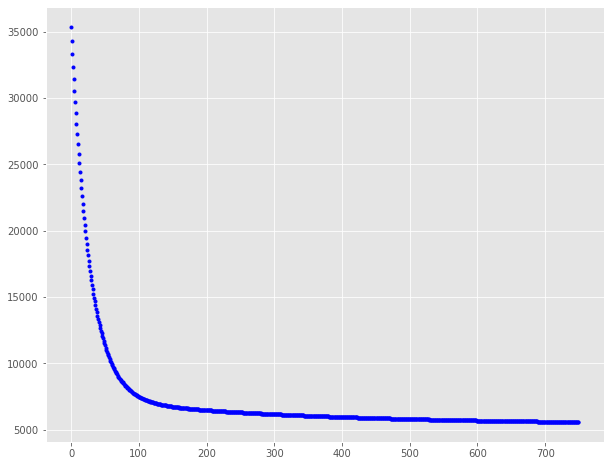

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(750),cost_history[:750],'b.')

In [13]:
 def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

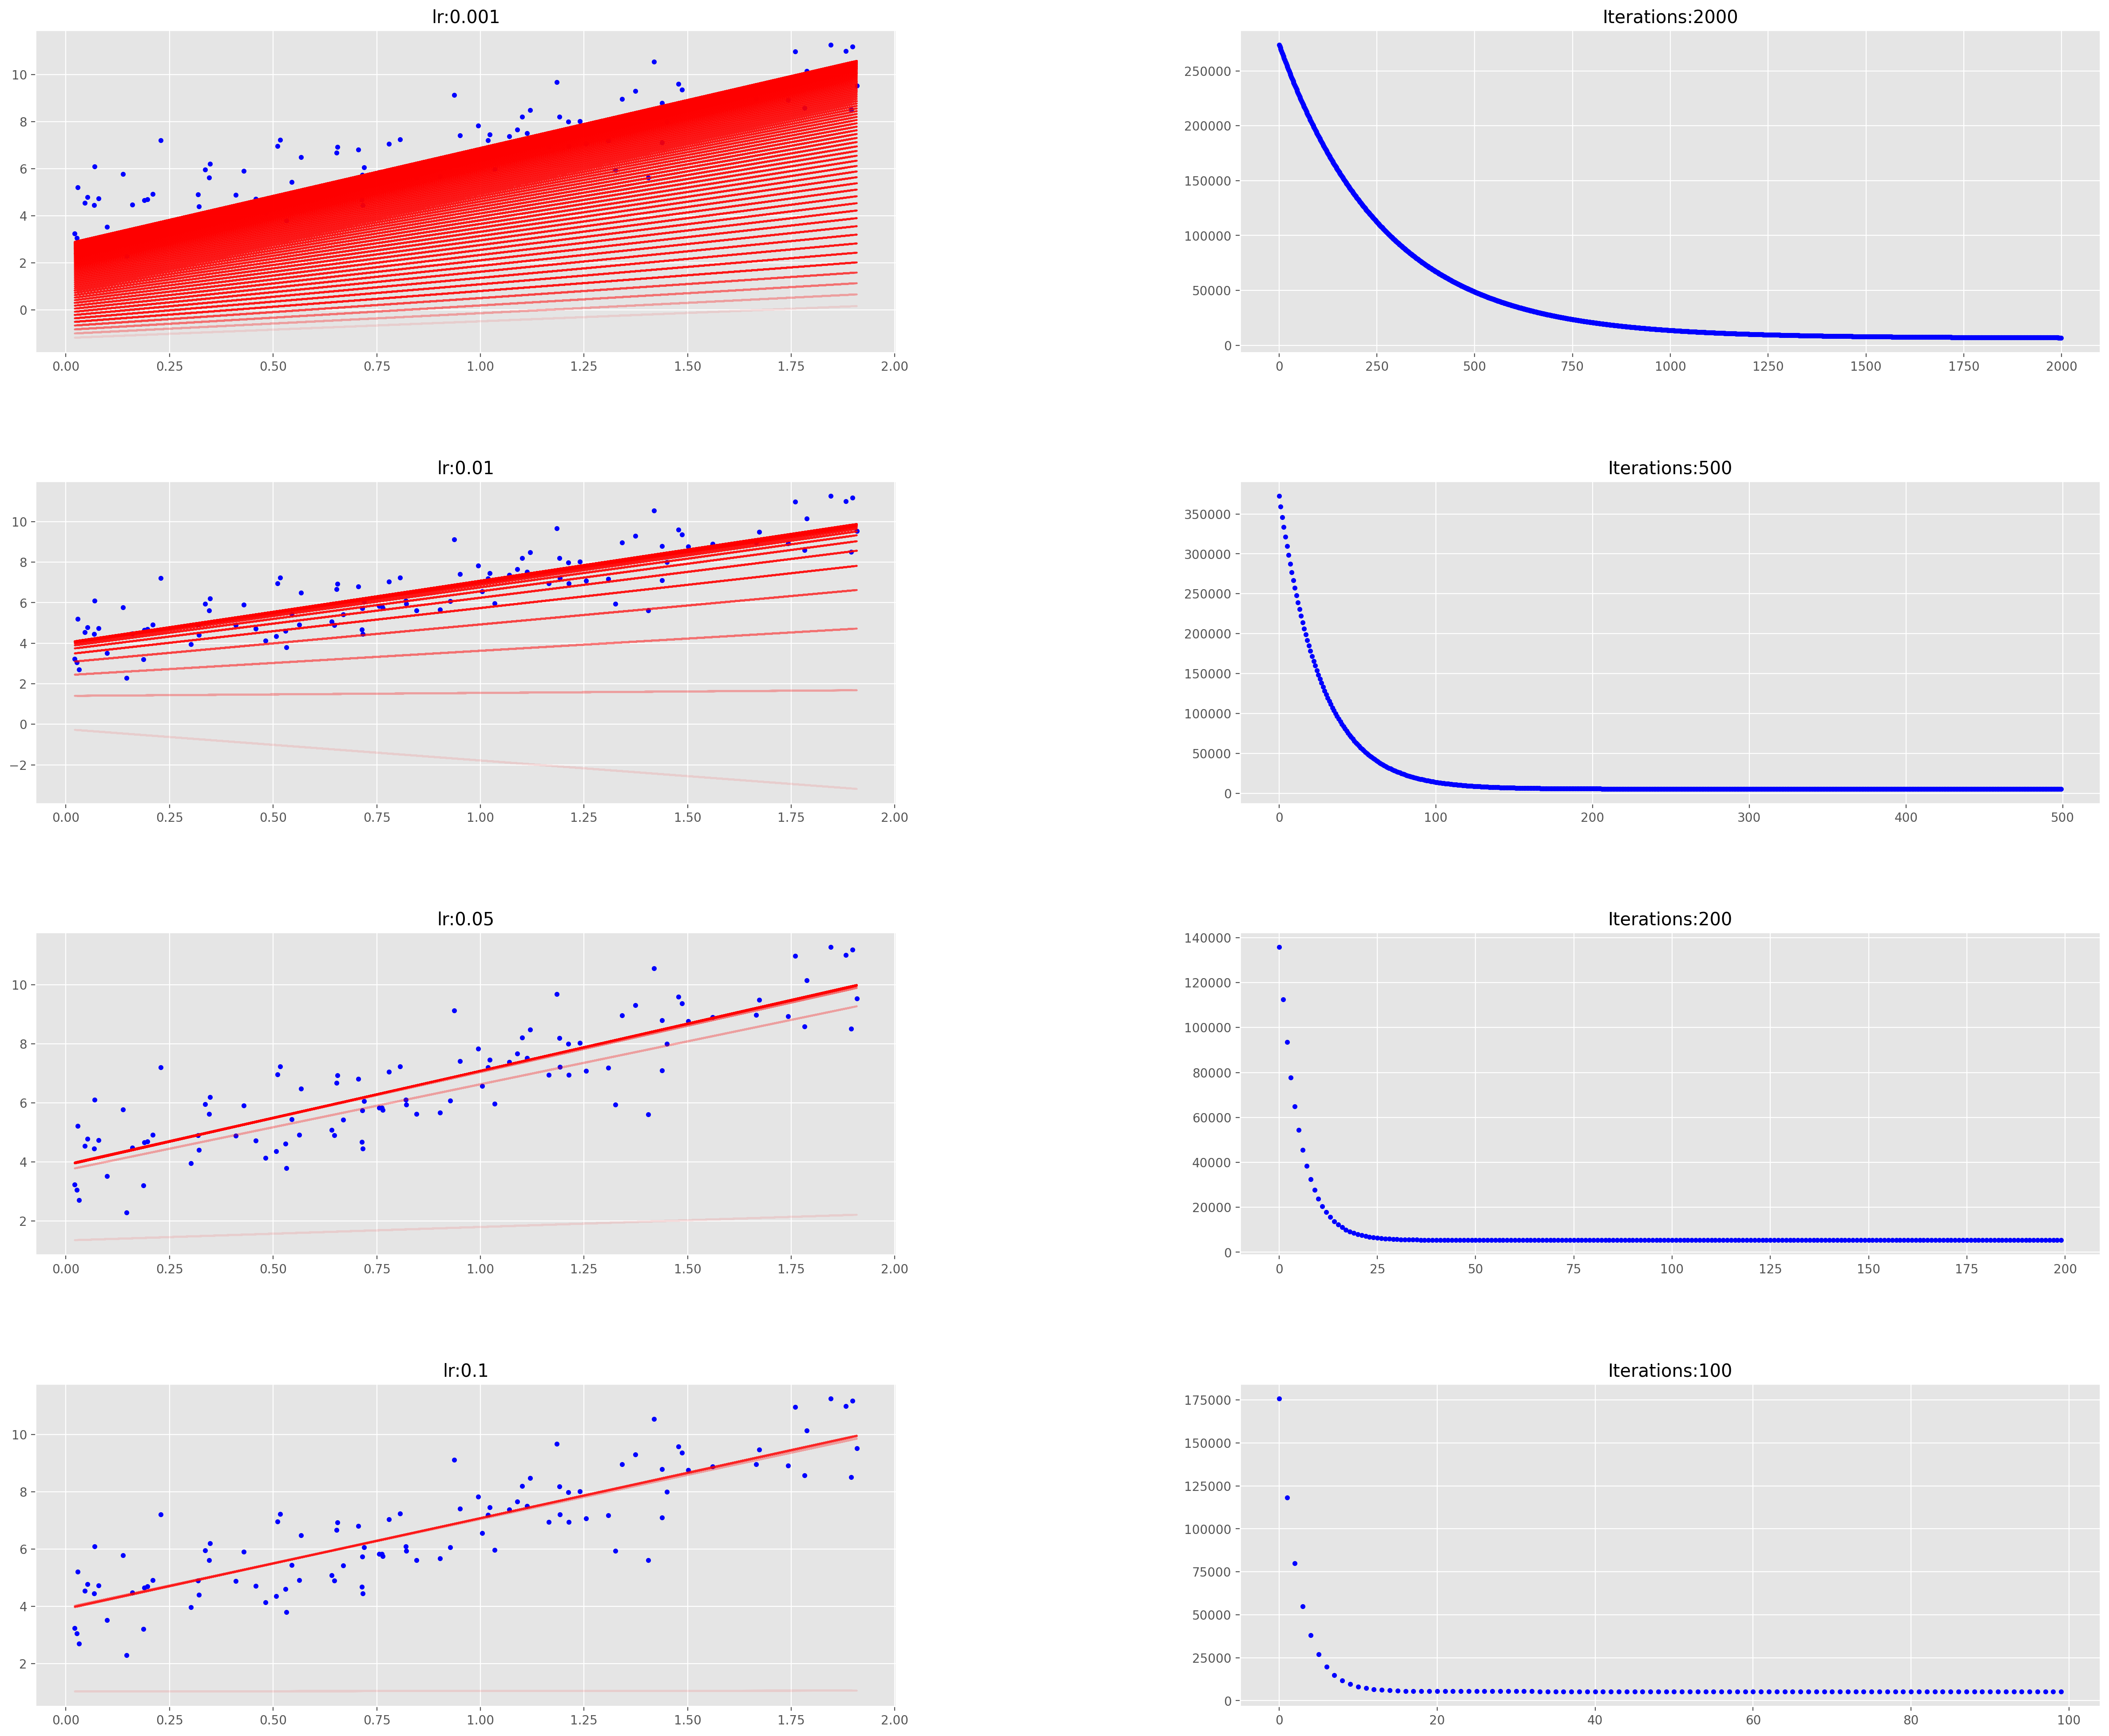

In [14]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

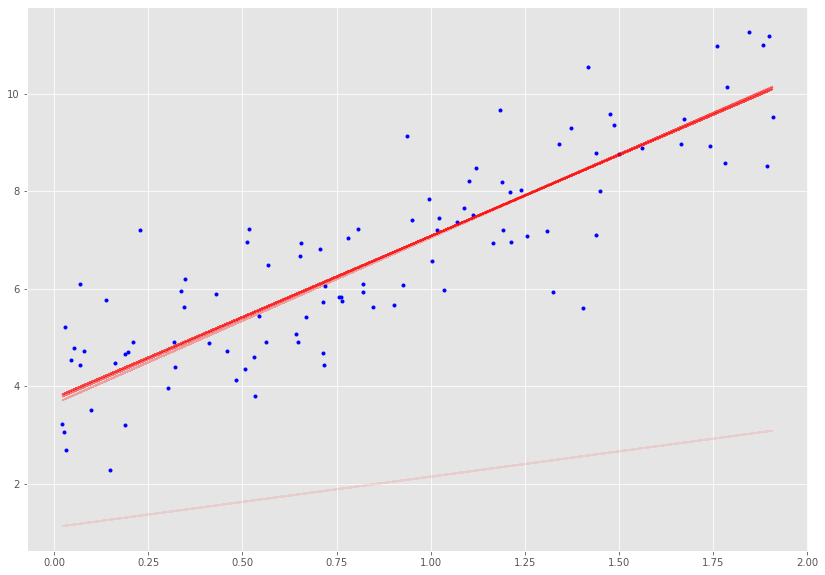

In [15]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)